Coursera Google Advanced Data Analytics

Course 6 The Nuts and Bolts of Machine Learning

Module 2 Workflow for building complex models

Construct a Naive Bayes model with Python

For this lesson, we're going to use the `GaussianNB` classifier. This implementation assumes that all of your variables are continuous _and_ that they have a Gaussian (i.e., normal) distribution. Our data doesn't perfectly adhere to these assumptions, but a Gaussian model may still yield usable results, even with imperfect data.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import MinMaxScaler


* Dropped the `RowNumber`, `CustomerId`, `Surname`, and `Gender` columns
* Dummy encoded the `Geography` column to convert categorical to Boolean
* Engineered a new feature called `Loyalty`, by dividing each customer's tenure by their age

In [ ]:
url = 'https://raw.githubusercontent.com/adacert/churn/main/churn_df.csv'
churn_df = pd.read_csv(url)
churn_df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Loyalty,Geography_Germany,Geography_Spain
0,619,42,2,0.00,1,1,1,101348.88,1,0.047619,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0.024390,0,1
2,502,42,8,159660.80,3,1,0,113931.57,1,0.190476,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0.025641,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0.046512,0,1


The class is split roughly 80/20. In other words, ~20% of the people in this dataset churned. This is an unbalanced dataset, but it's not extreme.

Also, the Naive Bayes formula depends on class priors _(P(c))_ to make predictions. Because of this, performing class balancing (e.g., upsampling or downsampling) would change those terms in a way that would no longer reflect the real-world distribution of the data.

For these reasons, we'll proceed without altering the class balance of our target variable.

In [ ]:
# Check class balance
churn_df['Exited'].value_counts()

,count
Exited,
0,7963
1,2037


`Loyalty` feature that represents the percentage of each customer's life that they were customers.

$$\text{Loyalty} = \frac{\text{Tenure}}{\text{Age}}$$

In [ ]:
# Drop Tenure and Age variables
churn_df = churn_df.drop(['Tenure', 'Age'], axis=1)
churn_df.head()

,CreditScore,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Loyalty,Geography_Germany,Geography_Spain
0,619,0.00,1,1,1,101348.88,1,0.047619,0,0
1,608,83807.86,1,0,1,112542.58,0,0.024390,0,1
2,502,159660.80,3,1,0,113931.57,1,0.190476,0,0
3,699,0.00,2,0,0,93826.63,0,0.025641,0,0
4,850,125510.82,1,1,1,79084.10,0,0.046512,0,1


## Split the data

The data must be splited into features and target variable, and into training data and test data using the `train_test_split()` function. 25% of the data will be put into our test set, and used the remaining 75% to train the model.

Notice below that we include the argument `stratify=y`. If our master data has a class split of 80/20, stratifying ensures that this proportion is maintained in both the training and test data. `=y` tells the function that it should use the class ratio found in the `y` variable (our target).

The less data you have overall, and the greater your class imbalance, the more important it is to stratify when you split the data. If we didn’t stratify, then the function would split the data randomly, and we could get an unlucky split that doesn’t get any of the minority class in the test data, which means we wouldn’t be able to effectively evaluate our model. Worst of all, we might not even realize what went wrong without doing some detective work.

In [ ]:
# Define the y (target) variable
y = churn_df['Exited']

# Define the X (predictor) variables
X = churn_df.copy()
X = X.drop('Exited', axis=1)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, \
                                                    stratify=y, random_state=42)

</br>  
$$P(A | B) = \frac{\text{P(B | A) ・ P(A)}}{\text{P(B)}}$$
 </br>

In [ ]:
# Fit the model
gnb = GaussianNB()
gnb.fit(X_train, y_train)

# Get the predictions on test data
y_preds = gnb.predict(X_test)

Accuracy is the proportion of data points that are correctly classified. It is an overall
representation of model performance, represented as:
</br>  
$$Accuracy = \frac{\text{true positives + true negatives}}{\text{total predictions}}$$
 </br>
 Precision measures the proportion of positive predictions that are true positives. It is
represented as:
</br>  
$$Precision = \frac{\text{true positives}}{\text{false positives + true positives}}$$
 </br>
 Recall measures the proportion of actual positives that are correctly classified. It is
represented as:
 </br>  
$$Recall = \frac{\text{true positives}}{\text{true positives + false negatives}}$$
 </br>
 F score is a measurement that combines both precision and recall into a single
expression, giving each equal importance. It is calculated as:
 </br>  
$$F_1 = 2 ・\frac{\text{precisions ・ recall}}{\text{precisions + recall}}$$
 </br>

In [ ]:
print('Accuracy:', '%.3f' % accuracy_score(y_test, y_preds))
print('Precision:', '%.3f' % precision_score(y_test, y_preds))
print('Recall:', '%.3f' % recall_score(y_test, y_preds))
print('F1 Score:', '%.3f' % f1_score(y_test, y_preds))

Accuracy: 0.796
Precision: 0.000
Recall: 0.000
F1 Score: 0.000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Hmm… this isn’t very good. Our precision, recall, and F1 scores are all zero. What’s going on? Well, let’s consider our precision formula:
</br>  
$$precision = \frac{\text{true positives}}{\text{false positives + true positives}}$$
  </br>

There are two ways for the model to have a precision of zero. The first is if the numerator is zero, which would mean that our model didn’t predict any true positives.

The second is if the denominator is also zero, which would mean that our model didn’t predict any positives at all. Dividing by zero results in an undefined value, but scikit-learn will return a value of zero in this case. Depending on your modeling environment, you may get a warning that tells you there’s a denominator of zero.

We don’t have a warning, so let’s check which situation is occurring here. If we call `np.unique()` on the model's predictions and it doesn't return an array containing `[0, 1]`, we'll know it's not predicticting any churned customers.

In [ ]:
# Check unique values in predictions
np.unique(y_preds)

array([0])

This confirms that the model predicted 0 (not churned) for every sample in the test data.
  
Consider why this might be. Perhaps we did something wrong in our modeling process, or maybe using `GaussianNB` on predictor variables of different types and distributions just doesn't make a good model. Maybe there were problems with the data.

Before we give up, maybe the data can give us some insight into what might be happening or what further steps we can take. Let's use `describe()` to inspect the X data.

In [ ]:
# Get descriptive stats for data
X.describe()

,CreditScore,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Loyalty,Geography_Germany,Geography_Spain
count,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,650.528800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.137936,0.250900,0.247700
std,96.653299,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.089506,0.433553,0.431698
min,350.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000,0.000000,0.000000
25%,584.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.064516,0.000000,0.000000
50%,652.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.129032,0.000000,0.000000
75%,718.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.200000,1.000000,0.000000
max,850.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,0.555556,1.000000,1.000000


Something that stands out is that the `Loyalty` variable we created is on a vastly different scale than some of the other variables we have, such as `Balance` or `EstimatedSalary`. The maximum value of `Loyalty` is 0.56, while the maximum for `Balance` is over 250,000&mdash;almost six orders of magnitude greater!

In [ ]:
# Instantiate the scaler
scaler = MinMaxScaler()

# Fit the scaler to the training data
scaler.fit(X_train)

# Scale the training data
X_train = scaler.transform(X_train)

# Scale the test data
X_test = scaler.transform(X_test)

### 2. Scaled data

One thing that you can usually try when modeling is scaling your predictor variables. Some models require you to scale the data in order for them to operate as expected, others don't. Naive Bayes does not require data scaling. However, sometimes packages and libraries need to make assumptions and approximations in their calculations. We're already breaking some of these assumptions by using the `GaussianNB` classifier on this dataset, and it may not be helping that some of our predictor variables are on very different scales. In general, scaling might not improve the model, but it probably won't make it worse. Let's try scaling our data.

We'll use a function called `MinMaxScaler`, which we'll import from the `sklearn.preprocessing` module. `MinMaxScaler` normalizes each column so every value falls in the range of [0, 1]. The column's maximum value would scale to 1, and its minimum value would scale to 0. Everything else would fall somewhere between. This is the formula:

$${x_{scaled}} = \frac{x - x_{min}}{x_{max} - x_{min}}$$

To use a scaler, you must fit it to the training data, and transform both the training data _and_ the test data using that same scaler.

Let's apply this and retrain the model.

In [ ]:
# Fit the model
gnb_scaled = GaussianNB()
gnb_scaled.fit(X_train, y_train)

# Get the predictions on test data
scaled_preds = gnb_scaled.predict(X_test)

In [ ]:
print('Accuracy:', '%.3f' % accuracy_score(y_test, scaled_preds))
print('Precision:', '%.3f' % precision_score(y_test,scaled_preds))
print('Recall:', '%.3f' % recall_score(y_test, scaled_preds))
print('F1 Score:', '%.3f' % f1_score(y_test, scaled_preds))

Accuracy: 0.806
Precision: 0.544
Recall: 0.303
F1 Score: 0.389


The model is far from perfect, but at least it's predicting churned customers now.

In [ ]:
def conf_matrix_plot(model, x_data, y_data):
    '''
    Accepts as argument model object, X data (test or validate), and y data (test or validate).
    Returns a plot of confusion matrix for predictions on y data.
    '''

    model_pred = model.predict(x_data)
    cm = confusion_matrix(y_data, model_pred, labels=model.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=model.classes_)

    disp.plot()
    plt.show()

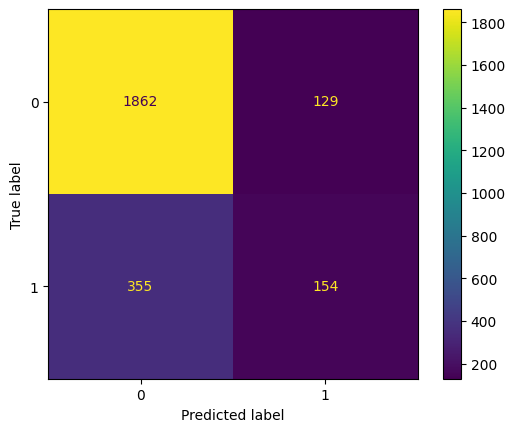

In [ ]:
conf_matrix_plot(gnb_scaled, X_test, y_test)

All of our model metrics can be derived from the confusion matrix, and each metric tells its own part of the story. What stands out most in the confusion matrix is that the model misses a lot of customers who will churn. In other words, there are a lot of false negatives&mdash;355, to be exact. This is why our recall score is only 0.303.